## 사용할 패키지

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import tensorflow as tf

In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\envs\data_engeneering\lib\site-packages\m

## 데이터 불러오기

In [2]:
energy = pd.read_csv('data/add_energy.csv')
dangjin_fcst = pd.read_csv('data/add_dangjin_fcst_rev.csv')
ulsan_fcst = pd.read_csv('data/add_ulsan_fcst_rev.csv')

In [3]:
energy.head()

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2015-01-01 01:00:00,NaN,0.0,0.0,0.0
1,2015-01-01 02:00:00,NaN,0.0,0.0,0.0
2,2015-01-01 03:00:00,NaN,0.0,0.0,0.0
3,2015-01-01 04:00:00,NaN,0.0,0.0,0.0
4,2015-01-01 05:00:00,NaN,0.0,0.0,0.0


In [4]:
energy

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2015-01-01 01:00:00,NaN,0.0,0.0,0.0
1,2015-01-01 02:00:00,NaN,0.0,0.0,0.0
2,2015-01-01 03:00:00,NaN,0.0,0.0,0.0
3,2015-01-01 04:00:00,NaN,0.0,0.0,0.0
4,2015-01-01 05:00:00,NaN,0.0,0.0,0.0
...,...,...,...,...,...
53347,2021-01-31 20:00:00,0.0,0.0,0.0,0.0
53348,2021-01-31 21:00:00,0.0,0.0,0.0,0.0
53349,2021-01-31 22:00:00,0.0,0.0,0.0,0.0
53350,2021-01-31 23:00:00,0.0,0.0,0.0,0.0


In [5]:
# dangjin_fcst = dangjin_fcst.drop('dangjin', axis=1)

In [6]:
dangjin_fcst

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2015-01-01 01:00:00,-4.200000,59.333333,14.800000,319.333333,3.0
1,2015-01-01 02:00:00,-4.800000,59.666667,15.000000,321.666667,3.0
2,2015-01-01 03:00:00,-5.400000,60.000000,15.200000,324.000000,3.0
3,2015-01-01 04:00:00,-5.400000,60.000000,15.200000,325.666667,3.0
4,2015-01-01 05:00:00,-5.400000,60.000000,15.200000,327.333333,3.0
...,...,...,...,...,...,...
54019,2021-02-28 20:00:00,7.666667,66.666667,1.133333,124.333333,4.0
54020,2021-02-28 21:00:00,7.000000,70.000000,1.300000,18.000000,4.0
54021,2021-02-28 22:00:00,6.833333,71.666667,1.533333,20.166667,4.0
54022,2021-02-28 23:00:00,6.666667,73.333333,1.766667,22.333333,4.0


In [7]:
# ulsan_fcst = ulsan_fcst.drop('ulsan', axis=1)

In [8]:
ulsan_fcst

,Forecast_time,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2015-01-01 01:00:00,-1.633333,44.000000,7.866667,289.000000,1.666667
1,2015-01-01 02:00:00,-2.216667,45.000000,8.033333,287.500000,1.833333
2,2015-01-01 03:00:00,-2.800000,46.000000,8.200000,286.000000,2.000000
3,2015-01-01 04:00:00,-3.133333,45.333333,8.233333,288.000000,2.000000
4,2015-01-01 05:00:00,-3.466667,44.666667,8.266667,290.000000,2.000000
...,...,...,...,...,...,...
54019,2021-02-28 20:00:00,14.000000,73.333333,3.900000,155.333333,4.000000
54020,2021-02-28 21:00:00,14.000000,75.000000,4.300000,154.000000,4.000000
54021,2021-02-28 22:00:00,13.833333,76.666667,4.066667,157.666667,4.000000
54022,2021-02-28 23:00:00,13.666667,78.333333,3.833333,161.333333,4.000000


## 학습 데이터 전처리

In [43]:
def train_datast(energy_df, fcst_df, target):
    # 일기 예보 있는 날짜만 선택
    energy = energy_df
    energy.index = range(energy.shape[0])
    
    # 발전량 데이터가 있는 날짜만 선택
    fcst = fcst_df.iloc[:-672] # 이게 잘못됨
    fcst.index = range(fcst.shape[0])
#     if target == 'dangjin_floating':
#         fcst = fcst_df.iloc[26304:-672]
#         fcst.index = range(fcst.shape[0])
    
    # 발전량과 일기예보 연결
    concat_df = pd.concat([energy, fcst], axis=1)
    
    # 예보 시간 및 날짜 정보 feature로 추가
#     concat_df['date'] = concat_df['date'].dt.date
    concat_df['hour'] = concat_df['date'].dt.hour
    
    concat_df['year'] = concat_df['date'].dt.year
    concat_df['month'] = concat_df['date'].dt.month
    concat_df['day'] = concat_df['date'].dt.day
    
    # 예보 시간, 날짜, 기상 예보 및 발전량 선택
#     feature_df = concat_df[['기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '전운량(10분위)', 'year', 'month', 'day', 'hour', 
#                             'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', target]]
    feature_df = concat_df[['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', target]]
    
    # 마지막 30일을 검증데이터셋으로 나머지를 학습 데이터셋으로 선택
    train_df = feature_df.iloc[:-24*30]
    val_df = feature_df.iloc[-24*30:]
#     if target == 'dangjin_floating':
#         train_df = feature_df.iloc[26304:-24*30]
#         val_df = feature_df.iloc[-24*30:]
    
    # 발전량이 0인 데이터를 제외
    train_df = train_df[train_df[target]!=0]
    
    train_x = train_df.loc[:, 'Temperature':'Cloud'].to_numpy()
    train_y = train_df[target].to_numpy()
    
    val_x = val_df.loc[:, 'Temperature':'Cloud'].to_numpy()
    val_y = val_df[target].to_numpy()
    
    return train_x, train_y, val_x, val_y

## LightGBM Custom Metric

In [10]:
def nmae_10(y_pred, dataset):
    y_true = dataset.get_label()
    
    absolute_error = abs(y_true - y_pred)
    absolute_error /= capacity
    
    target_idx = np.where(y_true>=capacity*0.1)
    
    nmae = 100 * absolute_error[target_idx].mean()
    
    return 'score', nmae, False

## Validation Metric

In [11]:
def sola_nmae(answer, pred):
    absolute_error = np.abs(answer - pred)
    
    absolute_error /= capacity
    
    target_idx = np.where(answer>=capacity*0.1)
    
    nmae = 100 * absolute_error[target_idx].mean()
    
    return nmae

## LightGBM Hyperparameter

In [57]:
params = {
    'learning_rate': 0.01,
    'max_depth': 16,
    'boosting': 'gbdt',
    'objective': 'regression',
    'metric':'mae',
    'is_training_metric': True,
    'num_layers': 12,
    'seed':154
}

In [13]:
import tensorflow as tf

In [14]:
dangjin_fcst['date'] = pd.to_datetime(dangjin_fcst['Forecast_time'])

In [15]:
ulsan_fcst['date'] = pd.to_datetime(ulsan_fcst['Forecast_time'])

In [16]:
dangjin_fcst.isnull().sum()

Forecast_time    0
Temperature      0
Humidity         0
WindSpeed        0
WindDirection    0
Cloud            0
date             0
dtype: int64

### 당진태양광 예측 모델 학습

In [58]:
train_x, train_y, val_x, val_y = train_datast(energy, dangjin_fcst, target='dangjin')
train_dataset = lgb.Dataset(train_x, train_y)
val_dataset = lgb.Dataset(val_x, val_y)
capacity = 1000
dangjin_model = lgb.train(params, train_dataset, 10000, val_dataset, feval=nmae_10, verbose_eval=500, early_stopping_rounds=100)

[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 23859, number of used features: 5
[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 309.862861
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[163]	valid_0's

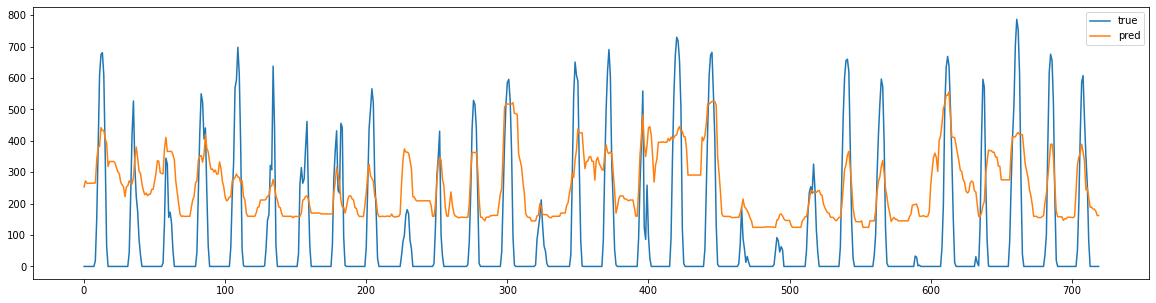

CV Score :  14.356549401821281


In [59]:
pred = dangjin_model.predict(val_x)

plt.figure(figsize=(20,5))
plt.plot(val_y, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.show()
print('CV Score : ', sola_nmae(val_y, pred))

### 당진수상태양광 예측 모델 학습

In [60]:
train_x, train_y, val_x, val_y = train_datast(energy, dangjin_fcst, target='dangjin_floating')
train_dataset = lgb.Dataset(train_x, train_y)
val_dataset = lgb.Dataset(val_x, val_y)
capacity = 1000
dangjin_floating_model = lgb.train(params, train_dataset, 10000, val_dataset, feval=nmae_10, verbose_eval=500, early_stopping_rounds=100)

[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 992
[LightGBM] [Info] Number of data points in the train set: 39283, number of used features: 5
[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 82.160069
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[389]	valid_0's 

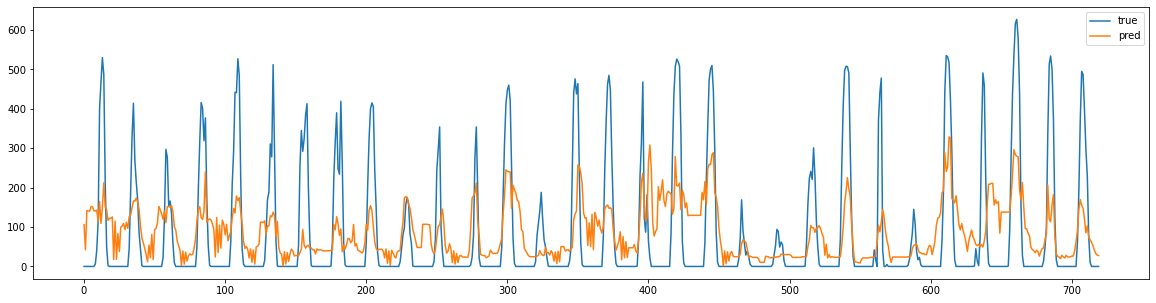

CV Score :  18.614554381970695


In [61]:
pred = dangjin_floating_model.predict(val_x)

plt.figure(figsize=(20,5))
plt.plot(val_y, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.show()
print('CV Score : ', sola_nmae(val_y, pred))

### 당진자재창고태양광 예측 모델 학습

In [62]:
train_x, train_y, val_x, val_y = train_datast(energy, dangjin_fcst, target='dangjin_warehouse')
train_dataset = lgb.Dataset(train_x, train_y)
val_dataset = lgb.Dataset(val_x, val_y)
capacity = 700
dangjin_warehouse_model = lgb.train(params, train_dataset, 10000, val_dataset, feval=nmae_10, verbose_eval=500, early_stopping_rounds=100)

[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000520 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 25267, number of used features: 5
[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 198.661179
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[125]	valid_0's

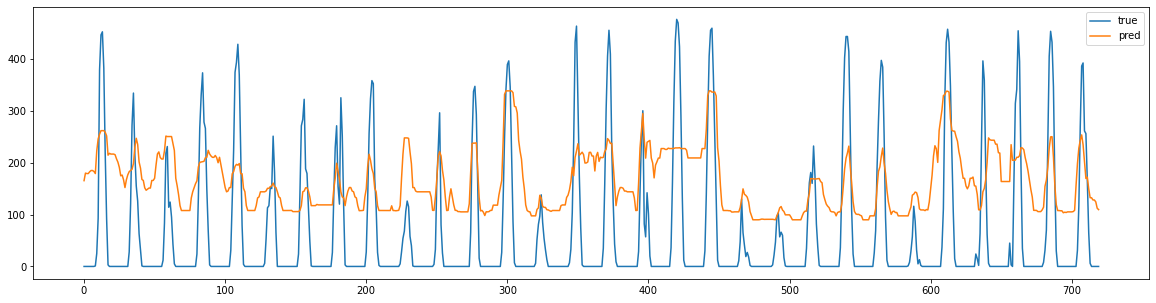

CV Score :  13.675029882926063


In [63]:
pred = dangjin_warehouse_model.predict(val_x)

plt.figure(figsize=(20,5))
plt.plot(val_y, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.show()
print('CV Score : ', sola_nmae(val_y, pred))

### 울산태양광 예측 모델 학습

In [64]:
train_x, train_y, val_x, val_y = train_datast(energy, ulsan_fcst, target='ulsan')
train_dataset = lgb.Dataset(train_x, train_y)
val_dataset = lgb.Dataset(val_x, val_y)
capacity = 500
ulsan_model = lgb.train(params, train_dataset, 10000, val_dataset, feval=nmae_10, verbose_eval=500, early_stopping_rounds=100)

[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1228
[LightGBM] [Info] Number of data points in the train set: 24485, number of used features: 5
[LightGBM] [Warning] Unknown parameter: num_layers
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 138.702879
Training until validation scores don't improve for 100 rounds
[500]	valid_0's l1: 64.2555	valid_0's score: 11.6

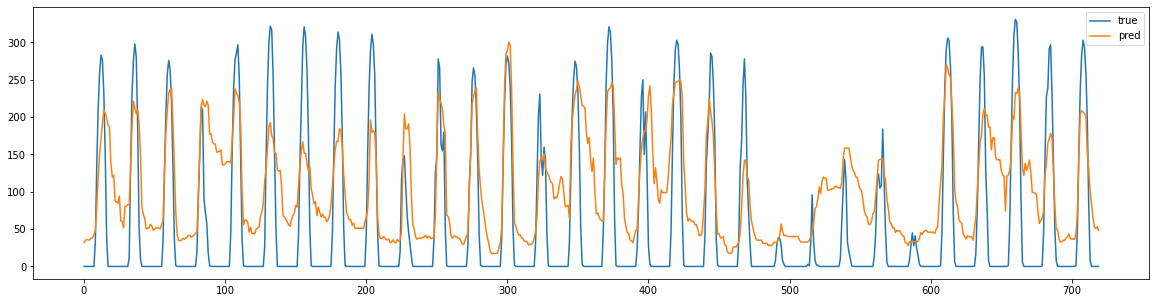

CV Score :  11.588772906383102


In [65]:
pred = ulsan_model.predict(val_x)

plt.figure(figsize=(20,5))
plt.plot(val_y, label='true')
plt.plot(pred, label='pred')
plt.legend()
plt.show()
print('CV Score : ', sola_nmae(val_y, pred))

## 테스트 데이터 전처리

In [66]:
def test_datast(fcst_df):
    start = '2021-02-01 00:00:00'
    end = '2021-02-28 23:00:00'
    
    start_idx = fcst_df[fcst_df['date']==start].index[0]
    end_idx = fcst_df[fcst_df['date']==end].index[0]
    
    test_df = fcst_df.loc[start_idx:end_idx, :].copy()
    
#     test_df['date'] = test_df['Forecast_time'].dt.date
    test_df['hour'] = test_df['date'].dt.hour
    
    test_df['year'] = test_df['date'].dt.year
    test_df['month'] = test_df['date'].dt.month
    test_df['day'] = test_df['date'].dt.day
    
#     test_df = test_df[['기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '전운량(10분위)', 'year', 'month', 'day', 'hour', 
#                             'Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud', target]]
    test_df = test_df[['Temperature', 'Humidity', 'WindSpeed', 'WindDirection', 'Cloud']]
    
    test_x = test_df.to_numpy()
    
    return test_x

In [67]:
dangjin_test = test_datast(dangjin_fcst)
ulsan_test = test_datast(ulsan_fcst)

## 각 발전소 발전량 추론

In [68]:
dangjin_floating_pred = dangjin_floating_model.predict(dangjin_test)
dangjin_warehouse_pred = dangjin_warehouse_model.predict(dangjin_test)
dangjin_pred = dangjin_model.predict(dangjin_test)
ulsan_pred = ulsan_model.predict(ulsan_test)

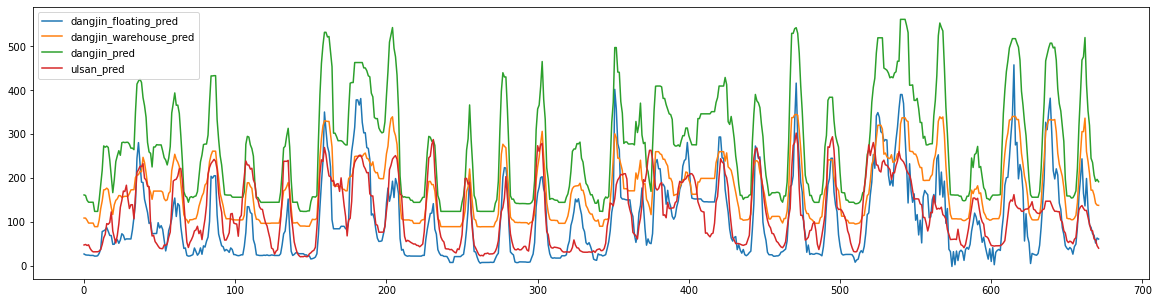

In [69]:
plt.figure(figsize=(20,5))
plt.plot(dangjin_floating_pred, label = 'dangjin_floating_pred')
plt.plot(dangjin_warehouse_pred, label = 'dangjin_warehouse_pred')
plt.plot(dangjin_pred, label = 'dangjin_pred')
plt.plot(ulsan_pred, label = 'ulsan_pred')
plt.legend()
plt.show()

## 제출

In [49]:
submission = pd.read_csv('./data/sample_submission.csv')

In [50]:
submission.iloc[:24*28, 1] = dangjin_floating_pred
submission.iloc[:24*28, 2] = dangjin_warehouse_pred
submission.iloc[:24*28, 3] = dangjin_pred
submission.iloc[:24*28, 4] = ulsan_pred

In [51]:
submission.head(30)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,28.061857,109.472546,162.045176,48.184722
1,2021-02-01 02:00:00,25.147554,109.338722,160.824744,49.328703
2,2021-02-01 03:00:00,25.065252,104.413181,149.967104,46.992093
3,2021-02-01 04:00:00,25.065252,97.998898,145.418847,48.537504
4,2021-02-01 05:00:00,25.012199,97.998898,145.418847,40.497034
5,2021-02-01 06:00:00,25.012199,97.998898,145.418847,35.324821
6,2021-02-01 07:00:00,25.012199,97.998898,145.418847,32.565513
7,2021-02-01 08:00:00,23.887662,89.881088,124.613696,32.637909
8,2021-02-01 09:00:00,23.887662,89.881088,124.613696,32.654632
9,2021-02-01 10:00:00,23.940715,89.881088,124.613696,32.762302


In [52]:
submission.to_csv('dacon_baseline_aug.csv', index=False)